
# CS 533 Project: TVCA - Speed Limits and Streets

by Ravishankar and Abishai Joy 

## Purpose and Context
The goal of the project is to understand (A) How infrastructure and (B) Posted speed limit in a street, affect the bike traffic. This section explains the posted speed limit impact. Ideally, the analysis will need a dataset containing speedlimts of the two roads at the intersection and the bike traffic at the intersection. However, the two data sets avaialble with the client were 1) Speed limit for different sections of each of the street, and,  2) a data set contained bike traffic at the intersection. Since there were no common links between the data sets, we built a merged data set for select intersections with the most traffic data.We have merged two datasets that had intersections and speedlimit details.



Weighted Average Speed Approach:

Speed limit of the road is expected to impact bike traffic for two reasons 1) Bikers would avoid high speed vehicular traffic for safety reasons 2) High speed limit roads will attract heavier automobile traffic. Now since bikers obviously travel along one of the roads at the intersection, the speed limit at both the intersection and along the length of the road is important. Also, automobile traffic at a particular intersection depends on length of the road with the higher speed limit and to a lesser extent on speed limit of the other road too (since drivers would always prefer the fast route to destination).

So, its important to factor the average speed of each of the individual roads in the analysis. A simple average speed of the two intersecting road will underestimate the impact of the length of individual sections. For instance if one road has length 1 mile at 35 miles/hr and the other is 20 miles long at 65 miles/hr, this will give a simple average of 50 miles/hr which is obviously not the average speed of vehicular traffic at the intersection.The weighted average speed at the intersection will better reflect the speed of vehicles the bikers encouter at the intersection and the vehicular traffic correlation with speed of the roads.

This weighted approoach is used in the analysis below and showed a clear corelation between speed and bike traffic.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

'''
Note: You may need to install simpledf usin `pip` because the conda installation is not 
      supported for python versions >3.4
'''
from simpledbf import Dbf5 

Let us look at the files.

In [2]:
bike_df=pd.read_csv("clean-data/Gen_traf_analysis_data/speed.csv")

In [3]:
bike_df.head()

,S.No.,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,Identifier_for_intersection,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
0,54.0,2660.012209,ACHD,2003.0,COLLECTOR,Bike Lane,8/9/2016,W,Bannock,A,St,0.503790,20.0,Boise,13th-6th,1.007580,2.0,NaN,NaN,2660.012209
1,92.0,1739.635128,ACHD,2003.0,ARTERIAL,Difficult Bike Route,8/8/2016,S,Five Mile,F,Rd,0.329476,35.0,Boise,NaN,0.658953,2.0,NaN,NaN,1739.635128
2,187.0,1360.656384,ACHD,2012.0,LOCAL,Shared Bike Route,8/17/2016,S,8th,B,St,0.257700,20.0,Boise,NaN,0.515400,2.0,NaN,NaN,1360.656384
3,187.0,1360.656384,ACHD,2012.0,LOCAL,Shared Bike Route,8/17/2016,S,8th,A,St,0.257700,20.0,Boise,NaN,0.515400,2.0,NaN,NaN,1360.656384
4,216.0,2173.544040,ACHD,2012.0,COLLECTOR,Bike Lane,8/9/2016,W,River,B,St,0.411656,30.0,Boise,Pioneer-Capitol,0.823312,2.0,NaN,NaN,2173.544040


The main master file reloaded that has an identifier for streets with most data.

In [4]:
bike_overall = pd.read_excel('clean-data/Gen_traf_analysis_data/maste_file_speed.xlsx')
bike_overall.head()

,Identifier,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-05-01 00:00:00,2019-05-01 00:00:00,Unnamed: 12,Bike_traffic_Total,Average,count
0,A,08th / Bannock,267.0,115.0,148.0,178.0,149.0,165,234,306,NaN,NaN,NaN,1562,195.250000,8
1,B,08th / River,252.0,249.0,115.0,146.0,123.0,295,177,302,NaN,NaN,NaN,1659,207.375000,8
2,C,13th / Fort,105.0,NaN,NaN,129.0,80.0,126,64,102,NaN,NaN,NaN,606,101.000000,6
3,D,Broadway / Warm Springs,NaN,58.0,NaN,64.0,47.0,73,65,62,NaN,NaN,NaN,369,61.500000,6
4,E,Collister / Catalpa,43.0,59.0,56.0,NaN,NaN,43,51,49,NaN,NaN,NaN,301,50.166667,6


Finding the weighted average using bike_dbf file.




\begin{align*}                                                
W_1 = (S_1*L_1)/L_t
\end{align*}

\begin{align*}
W_2 = (S_2*L_2)/L_t
\end{align*}


\begin{align*}
Average = (W_1+W_2)/2
\end{align*}

W_1 = Weighted average of the first street.

S_1 = Posted speed limit of the first street.

L_1 = Length  of the first street where speedlimit applies.
 
L_t = Total length of both streets.

In [6]:
length_int = bike_df.groupby('Identifier_for_intersection')['LengthMile'].sum().reset_index()
length_int

,Identifier_for_intersection,LengthMile
0,A,0.761490
1,B,0.669356
2,C,1.982224
3,D,0.437928
4,E,1.843564
5,F,1.204912
6,G,0.453644


In [7]:
merged_data = pd.merge(length_int,bike_df,how="right",left_on="Identifier_for_intersection" ,right_on="Identifier_for_intersection")
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1107
Data columns (total 21 columns):
Identifier_for_intersection    14 non-null object
LengthMile_x                   14 non-null float64
S.No.                          14 non-null float64
LENGTH                         14 non-null float64
AGENCY                         14 non-null object
YEAR                           14 non-null float64
FCLASS                         14 non-null object
PATHTYPE                       14 non-null object
Date                           14 non-null object
StPreDir                       13 non-null object
StName                         14 non-null object
StSuffix                       14 non-null object
LengthMile_y                   14 non-null float64
SpeedLimit                     14 non-null float64
City                           14 non-null object
Segment                        6 non-null object
BikeLnMile                     14 non-null float64
NoOfLanes                      14 non

In [8]:
merged_data['Weighted_average_speed'] = (merged_data['LengthMile_y'] * merged_data['SpeedLimit'])/merged_data['LengthMile_x']
merged_data.head()

,Identifier_for_intersection,LengthMile_x,S.No.,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,...,LengthMile_y,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe,Weighted_average_speed
0,A,0.761490,54.0,2660.012209,ACHD,2003.0,COLLECTOR,Bike Lane,8/9/2016,W,...,0.503790,20.0,Boise,13th-6th,1.007580,2.0,NaN,NaN,2660.012209,13.231691
1,A,0.761490,187.0,1360.656384,ACHD,2012.0,LOCAL,Shared Bike Route,8/17/2016,S,...,0.257700,20.0,Boise,NaN,0.515400,2.0,NaN,NaN,1360.656384,6.768309
2,B,0.669356,187.0,1360.656384,ACHD,2012.0,LOCAL,Shared Bike Route,8/17/2016,S,...,0.257700,20.0,Boise,NaN,0.515400,2.0,NaN,NaN,1360.656384,7.699939
3,B,0.669356,216.0,2173.544040,ACHD,2012.0,COLLECTOR,Bike Lane,8/9/2016,W,...,0.411656,30.0,Boise,Pioneer-Capitol,0.823312,2.0,NaN,NaN,2173.544040,18.450092
4,C,1.982224,228.0,6140.207828,ACHD,2013.0,COLLECTOR,Shared Bike Route,8/17/2016,W,...,1.162918,30.0,Boise,NaN,2.325836,2.0,NaN,NaN,6140.207828,17.600200


In [9]:
Bike_avg_speed = merged_data.groupby('Identifier_for_intersection')[['Weighted_average_speed']].mean().reset_index()
Bike_avg_speed.head()
#Bike_avg_speed['Weighted_average'].nlargest(10)

,Identifier_for_intersection,Weighted_average_speed
0,A,10.000000
1,B,13.075015
2,C,12.933367
3,D,17.500000
4,E,15.000000


In [10]:
data_speed = pd.merge(bike_overall, Bike_avg_speed, how='inner', left_on='Identifier', right_on='Identifier_for_intersection')
data_speed.head()

,Identifier,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-05-01 00:00:00,2019-05-01 00:00:00,Unnamed: 12,Bike_traffic_Total,Average,count,Identifier_for_intersection,Weighted_average_speed
0,A,08th / Bannock,267.0,115.0,148.0,178.0,149.0,165,234,306,NaN,NaN,NaN,1562,195.250000,8,A,10.000000
1,B,08th / River,252.0,249.0,115.0,146.0,123.0,295,177,302,NaN,NaN,NaN,1659,207.375000,8,B,13.075015
2,C,13th / Fort,105.0,NaN,NaN,129.0,80.0,126,64,102,NaN,NaN,NaN,606,101.000000,6,C,12.933367
3,D,Broadway / Warm Springs,NaN,58.0,NaN,64.0,47.0,73,65,62,NaN,NaN,NaN,369,61.500000,6,D,17.500000
4,E,Collister / Catalpa,43.0,59.0,56.0,NaN,NaN,43,51,49,NaN,NaN,NaN,301,50.166667,6,E,15.000000


In [11]:
data_min_speed = data_speed[['Location','Weighted_average_speed','Bike_traffic_Total']].set_index(['Location','Weighted_average_speed'])

Considering top few and lowest bike traffic counts.

In [12]:
a = data_min_speed['Bike_traffic_Total'].nsmallest(5).reset_index()
a.head()

,Location,Weighted_average_speed,Bike_traffic_Total
0,Collister / Catalpa,15.000000,301
1,Five Mile / McMillan,17.500000,355
2,Broadway / Warm Springs,17.500000,369
3,VMP / Chinden,19.741487,456
4,13th / Fort,12.933367,606


In [13]:
b = data_min_speed['Bike_traffic_Total'].nlargest(10).reset_index()
b

,Location,Weighted_average_speed,Bike_traffic_Total
0,08th / River,13.075015,1659
1,08th / Bannock,10.000000,1562
2,13th / Fort,12.933367,606
3,VMP / Chinden,19.741487,456
4,Broadway / Warm Springs,17.500000,369
5,Five Mile / McMillan,17.500000,355
6,Collister / Catalpa,15.000000,301


Let us plot and see this.

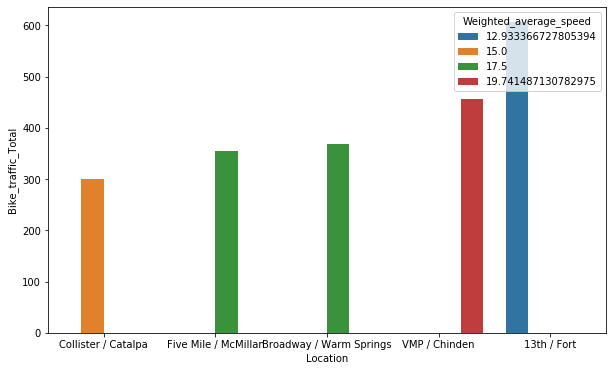

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Location", y="Bike_traffic_Total", hue="Weighted_average_speed", data=a)

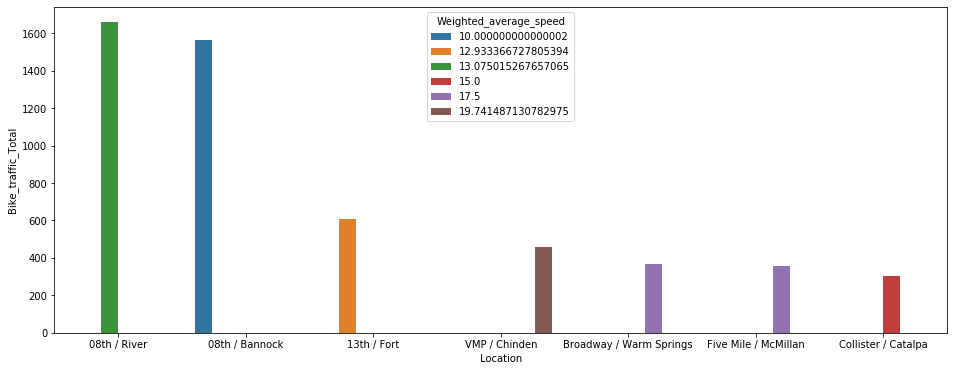

In [15]:
plt.figure(figsize=(16, 6))
sns.barplot(x="Location", y="Bike_traffic_Total", hue="Weighted_average_speed", data=b)

**Inference:**

- The right side of the plot shows the intersections with higher speed limit.Also, we can see that the bike traffic is less here.
- The left side of the plot shows the intersections with lower speed limit.Also, we can see that the bike traffic is more here.

# OLS Regression

OLS regression analysis using the speed and date values.

In [16]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import NaN



In [17]:
bike_count_summ = pd.read_excel(r'clean-data/Gen_traf_analysis_data/top_regression.xlsx')
bike_count_summ.head()

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September
0,08th / Bannock,267.0,115.0,148.0,178.0,149.0,165,234,306
1,08th / River,252.0,249.0,115.0,146.0,123.0,295,177,302
2,13th / Fort,105.0,NaN,NaN,129.0,80.0,126,64,102
3,Broadway / Warm Springs,NaN,58.0,NaN,64.0,47.0,73,65,62
4,Collister / Catalpa,43.0,59.0,56.0,NaN,NaN,43,51,49


In [18]:
df2 = bike_count_summ.melt(id_vars=["Location"], 
        var_name="Date", 
        value_name="Value")
df2.head()

,Location,Date,Value
0,08th / Bannock,2010,267.0
1,08th / River,2010,252.0
2,13th / Fort,2010,105.0
3,Broadway / Warm Springs,2010,NaN
4,Collister / Catalpa,2010,43.0


In [19]:
df3 = pd.read_csv('clean-data/Gen_traf_analysis_data/regression_Speed.csv')

In [20]:
mod = smf.ols('Value ~ speed + Date', data=df3)
fitted_model = mod.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     4.001
Date:                Tue, 17 Dec 2019   Prob (F-statistic):            0.00168
Time:                        22:36:02   Log-Likelihood:                -250.36
No. Observations:                  46   AIC:                             518.7
Df Residuals:                      37   BIC:                             535.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                369.8270     50.761      7.286      0.000     266.976     472.678
Date[T.2011]             -13.7200     36.047     -0.381      0.706     -86.758      59.318
Date[T.2012-May]         -53.9892     40.333     -1.339      0.189    -135.712      27.733
Date[T.2012-September]   -26.3242     40.463     -0.651      0.519    -108.309      55.661
Date[T.2013-May]         -42.1447     37.749     -1.116      0.271    -118.631      34.341
Date[T.2013-September]    -6.8481     34.697     -0.197      0.845     -77.150      63.454
Date[T.2014-May]         -22.7052     34.697     -0.654      0.517     -93.007      47.597
Date[T.2014-September]     6.8662     34.697      0.198      0.844     -63.436      77.168
speed                    -16.1700      2.995     -5.400      0.000     -22.238     -10.102
==============================================================================
Omnibus:                        4.032   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                3.513
Skew:                           0.677   Prob(JB):                        0.173
Kurtosis:                       2.964   Cond. No.                         128.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Inference:**

From the above analysis we can conclude that speed is a good predictor variable for bike traffic.